# Individual Analysis for the Franck-Hertz Experiment

#### Zachary Banken


Use this template to carry out the analysis tasks for the experiment.  You may need to consult the documentation for different Python packages.  Also recommended: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

We will also be using [**LMFit**](https://lmfit.github.io/lmfit-py/) for curve fitting 
and the [Uncertainties](https://pythonhosted.org/uncertainties/) package for calculating statistical uncertainty. 

In [1]:
# Run this cell with Shift-Enter, and wait until the asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as up
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from lmfit.models import LinearModel
from lmfit.models import QuadraticModel

## Summary of tasks

### Prior to working on this notebook

1. Watch the videos on the experiment and work out at least exercises 2 and 3 on the mean free path of electrons in the mercury F-H tube given in the experiment instructions.  These will be relevant to the "RSB" method of analyzing Franck-Hertz data.


2. Read through the paper by Rapior, Sengstock and Baev (RSB) linked on the experiment page: Rapior, G., K. Sengstock, and V Baev, <a href="http://courses.washington.edu/phys432/restricted/AJP_rapior_sengstock_baev.pdf" target="_blank">"New features of the Franck-Hertz experiment,"</a> <i>Am. J. Phys.,</i> <strong>74</strong>, p. 423-428 (2006).  Also study the lecture notes on this paper.


3. Download the PDFs of the chart-recorder scans for the two Franck-Hertz data runs (one for Hg, the other for Ne).


4. Extract from the scans the positions in paper-grid units of (1) calibration marks, (2) positions of anode current minima ("troughs") and maxima ("peaks"), and, for neon (3) positions of the small features (tiny peaks and troughs) seen in the neon-scan lock-in amp output.  The separations of similar features will be used to estimate the 3s-3p state separation.  **You do not need to estimate the uncertainty in these measurements**, but make your estimates of position to within 1/10 of small square.


5. Assign numbers to each anode current feature, for example, 1, 2, 3,... for peak 1, peak 2, peak 3... and similarly for the troughs.  (Not necessary for the Ne lock-in scan; these will be analyzed differently.)


6. Create spreadsheets with these data to be read into the notebook for further processing.

### Tasks for this notebook

For the neon data set:

* Plot and fit the calibration data.  Create a calibration function to turn feature positions into voltages.


* Apply the calibration to all of the position measurements.


* For the anode current peaks and troughs, analyze each set in three different ways:
  1. Fit a line through the peak/trough position vs. number.  From this obtain the average energy difference.
  2. Fit a quadratic through the peak/trough positions vs. number.  From this obtain the fit parameters to use in the RSB formalism.
  3. Take first differences of the peak/trough positions, and plot/fit these to a line.  The fit line should extrapolate to the energy of the first excited state, acccording to the RSB formalism.  Test this idea with a calculation from the fit.


* From the measurements taken from the lock-in scan for neon, take differences between adjacent features that indicate transitions between the 3s and 3p states.  Look at the list of differences to see if they have about the same value, and check any outliers against the original XY plot.  Then calculate an average and uncertainty to compare to the expected 1.7 V average separation between these states.

For the mercury data set:

* Plot and fit the calibration data.  Create a calibration function to turn feature positions into voltages.


* Apply the calibration to all of the position measurements.


* For the anode current peaks and troughs, analyze each set in three different ways:
  1. Fit a line through the peak/trough position vs. number.  From this obtain the average energy difference.
  2. Fit a quadratic through the peak/trough positions vs. number.  From this obtain the fit parameters to use in the RSB formalism.
  3. Take first differences of the peak/trough positions, and plot/fit these to a line.  The fit line should extrapolate to the energy of the first excited state, acccording to the RSB formalism.  Test this idea with a calculation from the fit.

* Use the fit coefficients associated with the RSB method to estimate the mean free path of the electrons between collisions with Hg atoms.  You will also need a dimension from the picture of the Hg tube.  Compare this result to the one calculated from the exercises and to the results cited by RSB in their paper.


## Read in the Franck-Hertz Data

You will probably want 4 to 5 different DataFrames: Neon calibration, neon peak/trough positions, neon small-feature positions, Mercury calibration, and mercury peak/trough positions.

One way to do it is create a different CSV file for each DataFrame.  Another way is to put each spreadsheet on a different Excel sheet within a single Excel file.  You can read the whole file into a Pandas "OrderedDict"
with the command 

    `FHdata = pd.read_excel('Franck-Hertz_data.xlsx', sheet_name = None)`

Then each sheet will be in its own DataFrame that you would reference with `FHdata['sheet-name']`.

In [6]:
Hg_PDA = pd.read_csv('mercury_actual.csv', skiprows=1, names = ['X', 'Y'])
Ne_PDA = pd.read_csv('Neon.csv', skiprows=1, names = ['X', 'Y'])

Hg_LockIn = pd.read_csv('Mercury_lockin.csv')
Ne_LockIn = pd.read_csv('Neon_lockin.csv')

Hg_cal = pd.read_csv('mercury_lockin_table.csv', sep='\t')
Ne_cal = pd.read_csv('neon_lockin_table.csv', sep='\t')

## Neon Analysis

Calibration first.  Fit a line to the calibration data, create a calibration function.

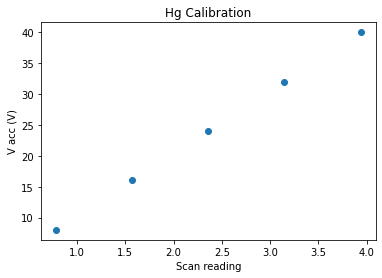

In [7]:
# Look at the calibration data first 
plt.scatter(Hg_cal['Cursor X'], Hg_cal['V acc'])
plt.ylabel('V acc (V)'); plt.xlabel('Scan reading'); plt.title('Hg Calibration')
plt.show()

### Fit a line

You know how to do this.  Save the fit results to use in the calibration function

In [8]:
##  Hint: make a function to do the fitting and plotting of the fit
##  Have it return the fit parameters as a Parameters object, like this


def model_fit_and_plot(xdata,ydata,yuncert=None,model=LinearModel(),makeplot=False):
    #
    param_guess = model.guess(ydata, x=xdata)
    
    if yuncert != None:
        line_fit = model.fit(ydata, param_guess, x=xdata, weights = 1/yuncert)
    else:
        line_fit = model.fit(ydata, param_guess, x=xdata)

    if makeplot:
        if model== LinearModel():
            print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
        if model == QuadraticModel():
            print('\na = ',line_fit.params['a'].value,'+/-',line_fit.params['a'].stderr)
            print('\nb = ',line_fit.params['b'].value,'+/-',line_fit.params['b'].stderr)
            print('\nc = ',line_fit.params['c'].value,'+/-',line_fit.params['c'].stderr)
        print(line_fit.fit_report())
        line_fit.plot();
    
    return line_fit.params


### Write a calibration function

Pass your fit constants to the calibration function.  Test it.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 5
    # variables        = 2
    chi-square         = 0.00103434
    reduced chi-square = 3.4478e-04
    Akaike info crit   = -38.4171547
    Bayesian info crit = -39.1982789
[[Variables]]
    slope:      10.1489514 +/- 0.00744907 (0.07%) (init = 10.14895)
    intercept:  0.05770208 +/- 0.01943625 (33.68%) (init = 0.05770208)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.904


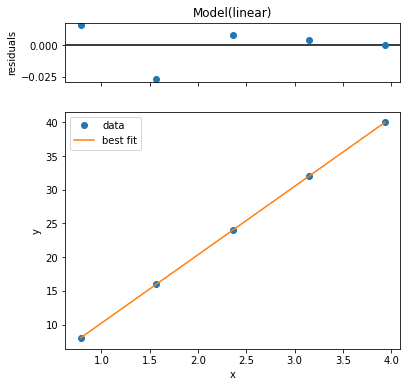

In [9]:
Hg_cal_params = model_fit_and_plot(Hg_cal['Cursor X'],Hg_cal['V acc'],makeplot=True)

### Apply the calibration

You might want to add columns of the calibrated data to the existing DataFrame, or make new DataFrames or arrays.  It is up to you.

In [10]:
Ne_cal_params = model_fit_and_plot(Ne_cal['Cursor X'],Ne_cal['V acc'])


Hg_PDA['V acc'] = Hg_PDA['X'] * Hg_cal_params['slope'] + Hg_cal_params['intercept']
Ne_PDA['V acc'] = Ne_PDA['X'] * Ne_cal_params['slope'] + Ne_cal_params['intercept']

Make a plot, just to check that it looks OK.

### Find peaks and troughs

In [11]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

In [12]:
def find_and_plot_peaks(xdata, ydata, title='Data', min_width=50, makeplot=False):
    '''
    Function locates peaks using SciPy.signal find_peaks() and plots
    the results (optionally).  Returns two arrays: 'peaks' which holds
    the index of each peak maximum and 'widths' which holds the FWHM of
    each peak.
    '''
    
    ydata = gaussian_filter1d(ydata,10)

    # Below does the work.  The height parameter makes the function only look 
    # for peaks higher than halfway up the tallest peak.
    
    
    #add prominence
    peaks, pk_props = find_peaks(ydata, width = min_width, prominence=0.001)
    peak_list = []
    width_list = []

    for pk, width in zip(peaks, pk_props['widths']): 
        
        peak_list.append(pk)
        
        print('Peak at {:.2f} has width {:.1f}'.format(pk, width))
    
    if makeplot:
        plt.figure(figsize=(12,8))
        plt.grid()
        plt.title(title)
        plt.plot(ydata,'-',label='Smoothed data')
        plt.vlines(x=peaks, ymin=0, ymax=ydata[peaks], color='C2', label='Locations')
        plt.hlines(y=pk_props['width_heights'], xmin=peaks-pk_props['widths']/2, 
                   xmax=peaks+pk_props['widths']/2, color = 'C1', label='Widths')
        plt.legend();
    
    return peak_list

Peak at 4796.00 has width 1069.8
Peak at 7908.00 has width 1141.2
Peak at 11190.00 has width 1242.9
Peak at 14598.00 has width 1326.9
Peak at 18115.00 has width 1396.2
Peak at 21627.00 has width 1413.5
Peak at 25188.00 has width 1406.5
Peak at 28441.00 has width 447.3


Peak at 1108.00 has width 219.1
Peak at 5693.00 has width 524.1
Peak at 9323.00 has width 1666.3
Peak at 12584.00 has width 1831.3
Peak at 16155.00 has width 1934.0
Peak at 19527.00 has width 1940.3
Peak at 23253.00 has width 1898.8
Peak at 26940.00 has width 1974.9
Peak at 4249.00 has width 3624.7
Peak at 11407.00 has width 4010.7
Peak at 18983.00 has width 3613.3
Peak at 27449.00 has width 2514.4


Peak at 7432.00 has width 2895.4
Peak at 14624.00 has width 3215.3
Peak at 22592.00 has width 3602.4
Peak at 29537.00 has width 336.7


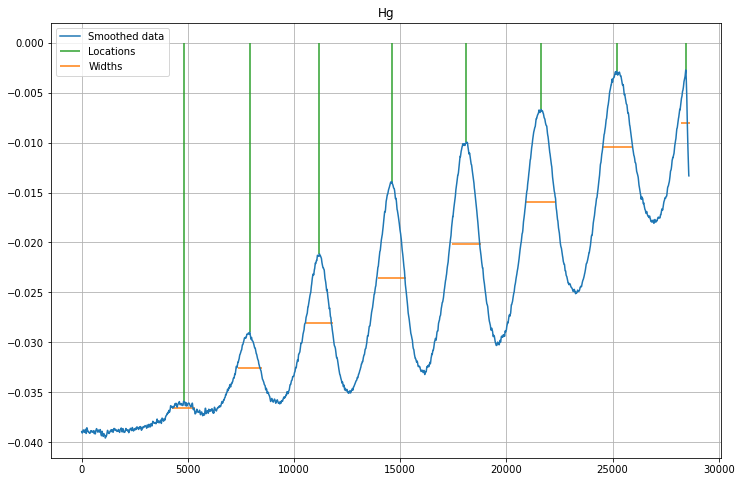

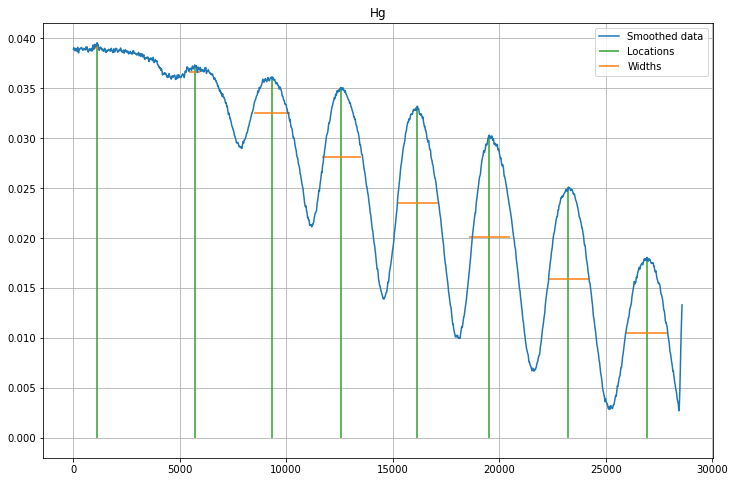

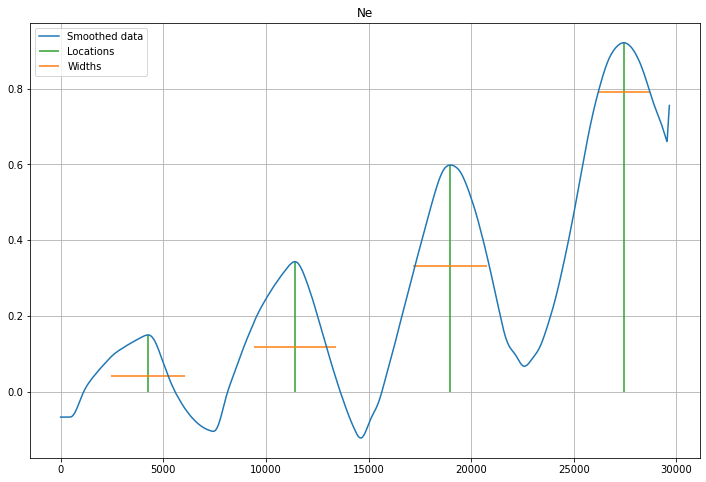

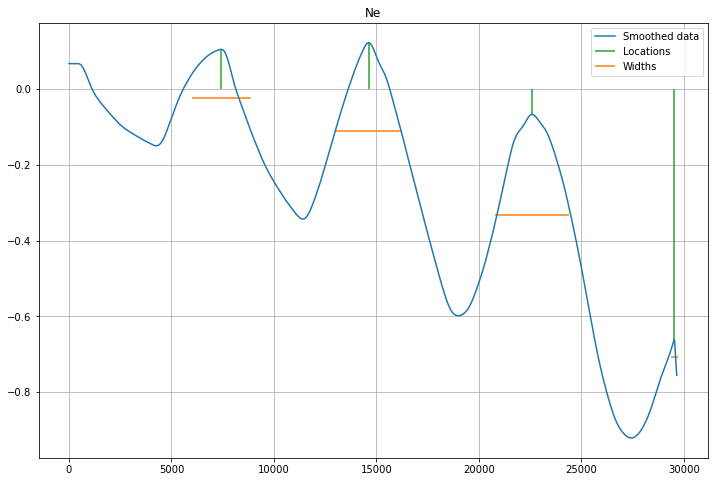

In [13]:
Hg_peaks = find_and_plot_peaks(Hg_PDA['V acc'], Hg_PDA['Y'], title='Hg', min_width=10, makeplot=True)
Hg_peaks = [Hg_PDA['V acc'][i] for i in Hg_peaks]
Hg_peaks = Hg_peaks[:-1]
print('\n')
Hg_troughs = find_and_plot_peaks(Hg_PDA['V acc'], -Hg_PDA['Y'], title='Hg', min_width=10,makeplot=True)
Hg_troughs = [Hg_PDA['V acc'][i] for i in Hg_troughs]
Hg_troughs = Hg_troughs[1:]

Ne_peaks = find_and_plot_peaks(Ne_PDA['V acc'], Ne_PDA['Y'], title='Ne', min_width=10,makeplot=True)
Ne_peaks = [Ne_PDA['V acc'][i] for i in Ne_peaks]
print('\n')
Ne_troughs = find_and_plot_peaks(Ne_PDA['V acc'], -Ne_PDA['Y'], title='Ne', min_width=10, makeplot=True)
Ne_troughs = [Ne_PDA['V acc'][i] for i in Ne_troughs]
Ne_troughs = Ne_troughs[:-1]


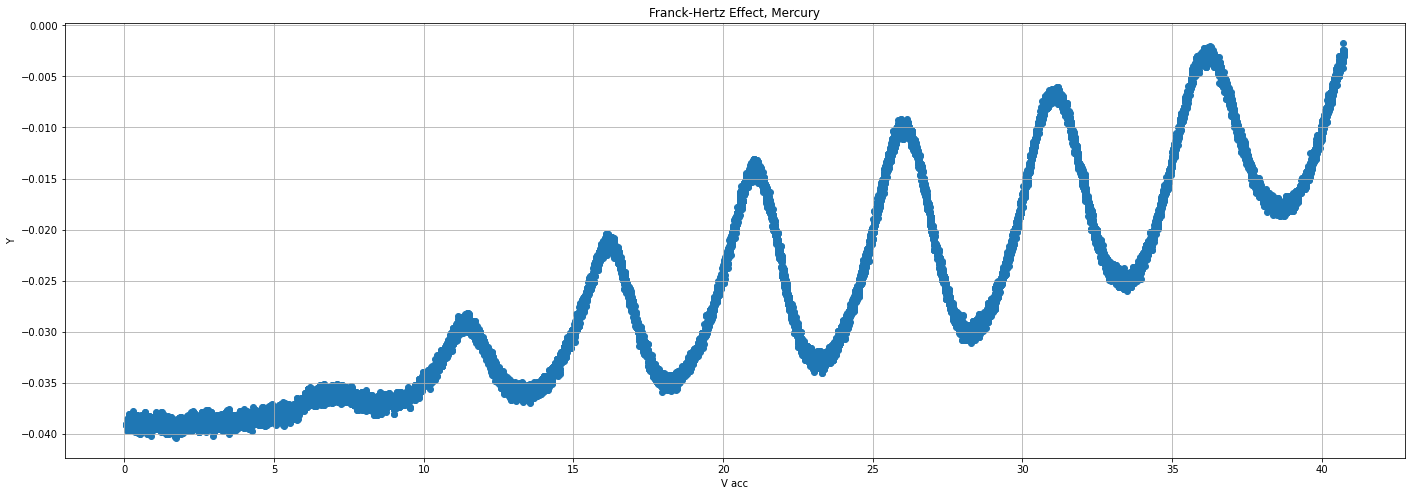

peaks [7.029016812583473, 11.503689491880563, 16.201639102328794, 21.079225152839523, 26.11107526487286, 31.105374256667144, 36.139254158983675]
troughs [8.316918747268891, 13.533479775072713, 18.20301232155625, 23.305905093501316, 28.121582540374686, 33.40918622809023, 38.60037487735415]


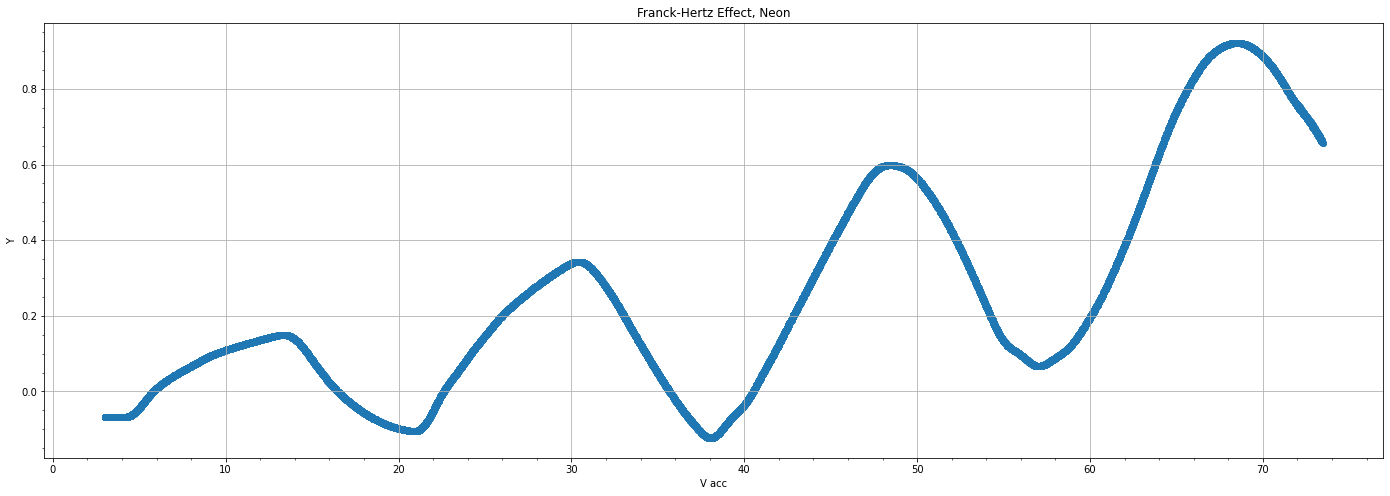

peaks [13.313782471300932, 30.404890519366763, 48.44572957152535, 68.52879403440365]
troughs [20.90353045283538, 38.05235136575546, 57.011533723577294]


In [14]:
plt.figure(figsize=(24,8))
plt.title('Franck-Hertz Effect, Mercury')
plt.xlabel('V acc'); plt.ylabel('Y')
plt.scatter(Hg_PDA['V acc'], Hg_PDA['Y'], label = 'Hg')
plt.grid()
plt.show()
print('peaks',Hg_peaks)
print('troughs',Hg_troughs)

plt.figure(figsize=(24,8))
plt.title('Franck-Hertz Effect, Neon')
plt.xlabel('V acc'); plt.ylabel('Y')
plt.grid()
plt.scatter(Ne_PDA['V acc'], Ne_PDA['Y'], label = 'Ne')

plt.minorticks_on()
plt.show()
print('peaks',Ne_peaks)
print('troughs',Ne_troughs)

#### Plot peak/troughs

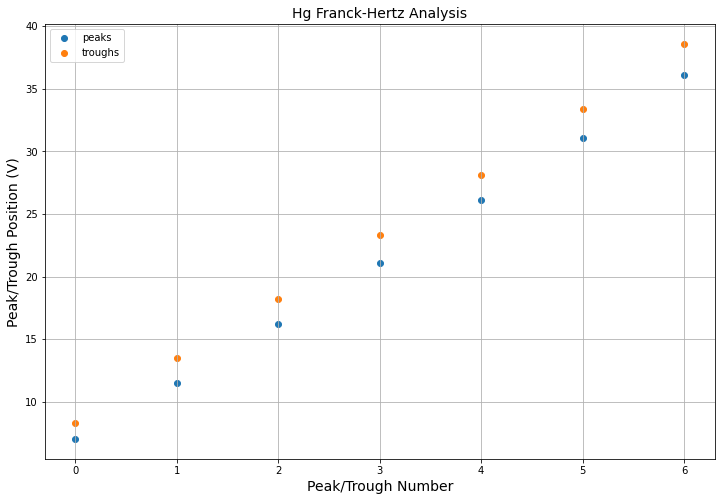

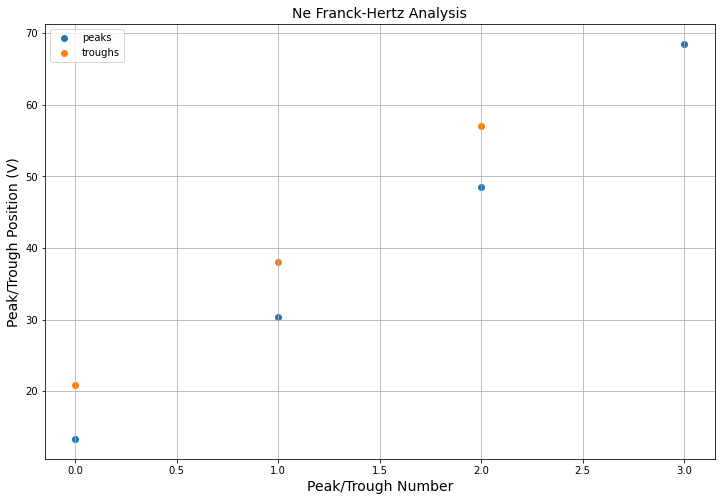

In [15]:

### Mercury
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Hg Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

Hg_peaks_num = np.arange(0,len(Hg_peaks))
Hg_troughs_num = np.arange(0,len(Hg_troughs))

plt.scatter(Hg_peaks_num, Hg_peaks, label = 'peaks')
plt.scatter(Hg_troughs_num, Hg_troughs, label = 'troughs')

plt.legend();
plt.show()


### Neon
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Ne Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

Ne_peaks_num = np.arange(0,len(Ne_peaks))
Ne_troughs_num = np.arange(0,len(Ne_troughs))

plt.scatter(Ne_peaks_num, Ne_peaks, label = 'peaks')
plt.scatter(Ne_troughs_num, Ne_troughs, label = 'troughs')

plt.legend();
plt.show()

### Fit the peak/trough positions 

Fit the peak and trough positions versus number in two different ways: with a line, to find the average spacing, and with a quadratic, to find the coefficients to apply to the model of RSB.  Save the fit results.  Recommended: just same the `params` object as a whole.

To fit to a quadratic, you may us the `QuadraticModel` in exactly the same way as the `LinearModel`.  Look up **QuadraticModel** in the LMFit documenation for details.

#### Neon troughs first

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 3
    # variables        = 2
    chi-square         = 0.54623476
    reduced chi-square = 0.54623476
    Akaike info crit   = -1.10995616
    Bayesian info crit = -2.91273158
[[Variables]]
    slope:      18.0540016 +/- 0.52260634 (2.89%) (init = 18.054)
    intercept:  20.6018035 +/- 0.67468188 (3.27%) (init = 20.6018)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.775


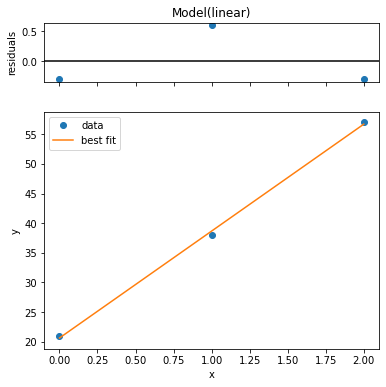

In [16]:
# Troughs line fit
Ne_troughs_line_fit = model_fit_and_plot(Ne_troughs_num,Ne_troughs,makeplot=True)

[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 3
    # variables        = 3
    chi-square         = 5.0487e-29
    reduced chi-square = 5.0487e-29
    Akaike info crit   = -192.763342
    Bayesian info crit = -195.467505
[[Variables]]
    a:  0.90518072 +/- 8.7023e-15 (0.00%) (init = 0.9051807)
    b:  16.2436402 +/- 1.8115e-14 (0.00%) (init = 16.24364)
    c:  20.9035305 +/- 7.1054e-15 (0.00%) (init = 20.90353)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.961
    C(b, c) = -0.588
    C(a, c) = 0.408


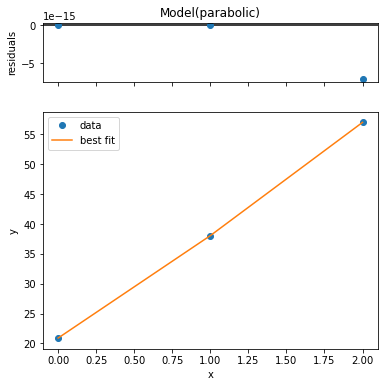

In [17]:
# Now with a quadratic
Ne_troughs_quad_fit = model_fit_and_plot(Ne_troughs_num, Ne_troughs, model = QuadraticModel(), makeplot=True)

#### Now neon peaks

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 4
    # variables        = 2
    chi-square         = 2.29762800
    reduced chi-square = 1.14881400
    Akaike info crit   = 1.78233170
    Bayesian info crit = 0.55492042
[[Variables]]
    slope:      18.3685874 +/- 0.47933580 (2.61%) (init = 18.36859)
    intercept:  12.6204181 +/- 0.89675516 (7.11%) (init = 12.62042)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.802


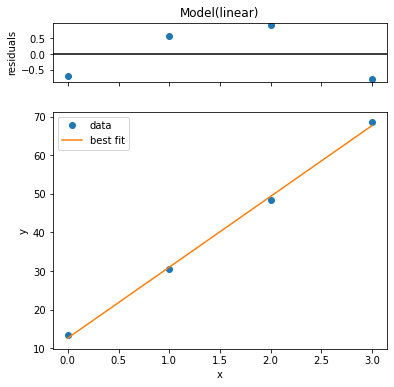

In [18]:
# Peaks line fit
Ne_peaks_line_fit = model_fit_and_plot(Ne_peaks_num,Ne_peaks,makeplot=True)

[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 4
    # variables        = 3
    chi-square         = 0.05967720
    reduced chi-square = 0.05967720
    Akaike info crit   = -10.8203983
    Bayesian info crit = -12.6615152
[[Variables]]
    a:  0.74798910 +/- 0.12214462 (16.33%) (init = 0.7479891)
    b:  16.1246201 +/- 0.38237312 (2.37%) (init = 16.12462)
    c:  13.3684072 +/- 0.23810364 (1.78%) (init = 13.36841)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.958
    C(b, c) = -0.688
    C(a, c) = 0.513


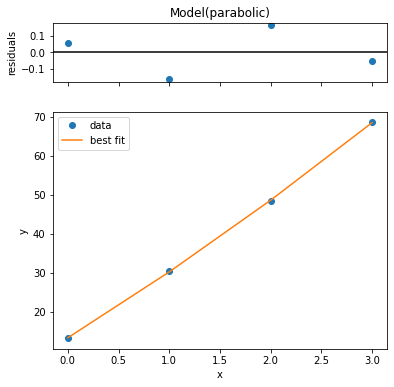

In [19]:
# Peaks quadratic
Ne_peaks_quad_fit = model_fit_and_plot(Ne_peaks_num, Ne_peaks,model = QuadraticModel(), makeplot=True)

### Plot the fitlines over the data

Show, on a single plot, the peak positions, the trough positions (both as dots) with fit lines and fit curves for each.  One member of the grou should include this plot in your Group Document.

Use the `model.eval()` function with the saved parameters to build fit lines. 

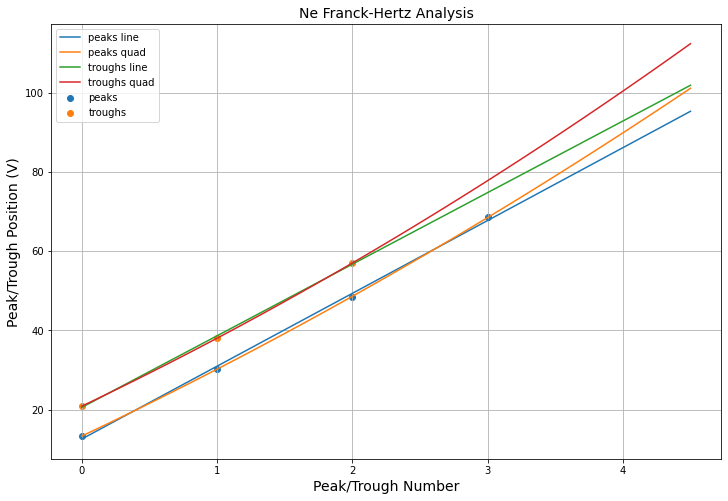

In [20]:
# For a smooth curve make an x range with a bunch of points.  100 should be fine.
line = LinearModel()
quad = QuadraticModel()

xfit = np.linspace(0,4.5,100) 
Ne_troughs_line = line.eval(Ne_troughs_line_fit,x=xfit)
Ne_peaks_line = line.eval(Ne_peaks_line_fit,x=xfit)

Ne_troughs_quad = quad.eval(Ne_troughs_quad_fit,x=xfit)
Ne_peaks_quad = quad.eval(Ne_peaks_quad_fit,x=xfit)
# Add more, as needed

# Then redo the above plot with fit lines and curves

### Neon
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Ne Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

plt.scatter(Ne_peaks_num, Ne_peaks, label = 'peaks')
plt.scatter(Ne_troughs_num, Ne_troughs, label = 'troughs')

plt.plot(xfit, Ne_peaks_line, label = 'peaks line')
plt.plot(xfit, Ne_peaks_quad, label = 'peaks quad')
plt.plot(xfit, Ne_troughs_line, label = 'troughs line')
plt.plot(xfit, Ne_troughs_quad, label = 'troughs quad')

plt.legend();
plt.show()


### Take differences in peak/trough positions

Next, apply the RSB approach as they describe it, by taking the <i>differences</i> in the positions of subsequent features to create an array $\Delta E(n) = E_n - E_{n-1}$; note $n$ is the upper number.

Then, plot and fit these to a line.  The energy of the lowest excited state should be given by $\Delta E(0.5)$.  Save the fit parameters as before.

In [21]:
# Recommended: use Python "List comprehensions"  See the Python text on how to make these

Ne_troughs_diff = [Ne_troughs[i] - Ne_troughs[i-1] for i in range(1,len(Ne_troughs))]
Ne_peaks_diff = [Ne_peaks[i] - Ne_peaks[i-1] for i in range(1,len(Ne_peaks))]

# Have a look at them, e.g., 
print('List of Neon peak differences (V):', Ne_peaks_diff)
print('List of Neon trough differences (V):', Ne_troughs_diff)

List of Neon peak differences (V): [17.09110804806583, 18.040839052158585, 20.083064462878298]
List of Neon trough differences (V): [17.148820912920083, 18.95918235782183]


In [22]:
Ne_troughs


[20.90353045283538, 38.05235136575546, 57.011533723577294]

In [23]:
Ne_peaks

[13.313782471300932, 30.404890519366763, 48.44572957152535, 68.52879403440365]

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 2
    # variables        = 2
    chi-square         = 2.000e-250
    reduced chi-square = 0.00000000
    Akaike info crit   = -1147.29255
    Bayesian info crit = -1149.90625
##  Warning: uncertainties could not be estimated:
    slope:      at initial value
    intercept:  at initial value
[[Variables]]
    slope:      1.81036144 +/- 0.00000000 (0.00%) (init = 1.810361)
    intercept:  17.1488209 +/- 0.00000000 (0.00%) (init = 17.14882)


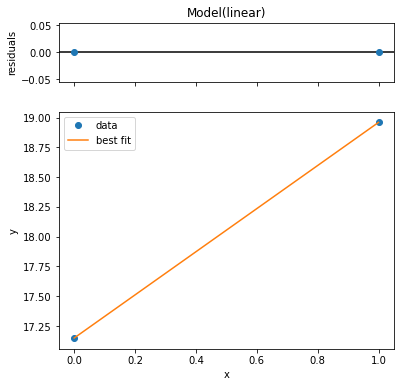

In [24]:
# Fit of line to trough diffs
Ne_troughs_diff_num = np.arange(0, len(Ne_troughs_diff))
Ne_troughs_diff_line_fit = model_fit_and_plot(Ne_troughs_diff_num , Ne_troughs_diff,makeplot=True)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 3
    # variables        = 2
    chi-square         = 0.19892400
    reduced chi-square = 0.19892400
    Akaike info crit   = -4.14033410
    Bayesian info crit = -5.94310953
[[Variables]]
    slope:      1.49597821 +/- 0.31537596 (21.08%) (init = 1.495978)
    intercept:  16.9090256 +/- 0.40714862 (2.41%) (init = 16.90903)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.775


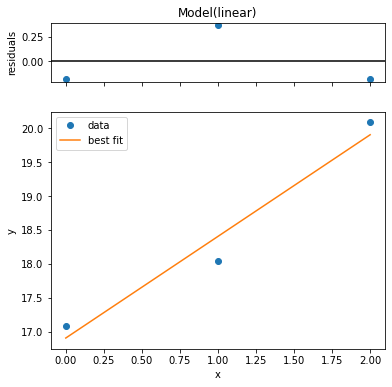

In [25]:
# Next, peak diffs
Ne_peaks_diff_num = np.arange(0, len(Ne_peaks_diff))
Ne_peaks_diff_line_fit = model_fit_and_plot(Ne_peaks_diff_num, Ne_peaks_diff,makeplot=True)

### Make a differences plot

Show, on a single plot, the peak position differences, the trough position differences (both as dots) with fit lines for each.  One member of the grou should include this plot in your Group Document.

In [26]:
Ne_troughs_diff

[17.148820912920083, 18.95918235782183]

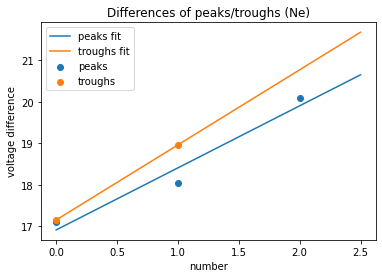

In [27]:
# Plot here
plt.title('Differences of peaks/troughs (Ne)')
plt.xlabel('number')
plt.ylabel('voltage difference')
plt.scatter(Ne_peaks_diff_num, Ne_peaks_diff, label = 'peaks')
plt.scatter(Ne_troughs_diff_num, Ne_troughs_diff, label = 'troughs')

xfit = np.linspace(0,2.5,100) 
Ne_troughs_diff_line = line.eval(Ne_troughs_diff_line_fit,x=xfit)
Ne_peaks_diff_line = line.eval(Ne_peaks_diff_line_fit,x=xfit)

plt.plot(xfit, Ne_peaks_diff_line, label = 'peaks fit')
plt.plot(xfit, Ne_troughs_diff_line, label = 'troughs fit')

plt.legend()


## Final results for neon excited state

Compare fit coefficients from the quadratic to similar from the RSB difference method.  Then calculate values for the lowest excited state of Neon from the three methods of analyzing the data set: simple average peak spacing, and RSB calculation from the results of the other two fits.

From the RSB analysis, expect energy troughs to follow

$$ E_n = E_a\frac{\lambda}{L}n^2 + E_an + c  = an^2 + bn +c$$

where $c$ is a constant, $n$ is the trough number, $\lambda/L$ is the ratio of the mean free path to the total travel distance from electrode to electrode, and $E_a$ is the lowest excited state.

Taking differences, RSB derive

$$ \Delta E(n) = E_{n} - E_{n-1} = E_a\left(1-\frac{\lambda}{L}\right) + E_a2\frac{\lambda}{L}n = p + mn$$

Thus, a quadratic fit to the trough positions should give $E_a$ as the linear-term coefficient, and a linear fit to  the differences in trough positions should give a line that evaluates to $E_a$ for $n=0.5$.

Further, if $m$ and $p$ are the slope and intercept of the linear fit to the differences, and $a$, $b$, and $c$ are the 2nd, 1st and 0th order coefficients in the quadratic fit to trough positions, then we expect $p=b-a$ and $m=2a$.

In [28]:
print('CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD')
print('Troughs analysis:')
# Your code here
p = unc.ufloat(Ne_troughs_diff_line_fit['intercept'].value, Ne_troughs_line_fit['intercept'].stderr)
m = unc.ufloat(Ne_troughs_diff_line_fit['slope'].value, Ne_troughs_line_fit['slope'].stderr)
a = unc.ufloat(Ne_troughs_quad_fit['a'].value, Ne_troughs_quad_fit['a'].stderr)
b = unc.ufloat(Ne_troughs_quad_fit['b'].value, Ne_troughs_quad_fit['b'].stderr)
c = unc.ufloat(Ne_troughs_quad_fit['c'].value, Ne_troughs_quad_fit['c'].stderr)

print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\nPeaks analysis:')
# Your code here
p = unc.ufloat(Ne_peaks_diff_line_fit['intercept'].value, Ne_peaks_line_fit['intercept'].stderr)
m = unc.ufloat(Ne_peaks_diff_line_fit['slope'].value, Ne_peaks_line_fit['slope'].stderr)
a = unc.ufloat(Ne_peaks_quad_fit['a'].value, Ne_peaks_quad_fit['a'].stderr)
b = unc.ufloat(Ne_peaks_quad_fit['b'].value, Ne_peaks_quad_fit['b'].stderr)
c = unc.ufloat(Ne_peaks_quad_fit['c'].value, Ne_peaks_quad_fit['c'].stderr)

print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\n\nCALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS')

# Your code here

Ea_trad_pk = unc.ufloat(np.mean(Ne_peaks_diff), np.std(Ne_peaks_diff))
Ea_trad_tr = unc.ufloat(np.mean(Ne_troughs_diff), np.std(Ne_troughs_diff))

print('"Traditional" average peak spacing: {:.2uP} V'.format(Ea_trad_pk))
print('"Traditional" average trough spacing: {:.2uP} V'.format(Ea_trad_tr))

# From quadratic fit, see E_a as parameter b
# From RSB n=1/2 method, E_a = p + m/2

# Your code here

Ea_quad = b
Ea_line = p + m / 2

print('\nRSB method using line fit to peak/trough position differences')

# Your code here
print(Ea_line)

print('\nRSB method using quadratic fit to peak/trough positions')

# Your code here
print(Ea_quad)


CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD
Troughs analysis:
p ?= b-a: 17.15+/-0.67 ?= 15.34+/-0.00 = 16.24+/-0.00-0.91+/-0.00
m ?= 2a: 1.81+/-0.52 ?= 1.81+/-0.00 = 2*0.91+/-0.00

Peaks analysis:
p ?= b-a: 16.91+/-0.90 ?= 15.38+/-0.40 = 16.12+/-0.38-0.75+/-0.12
m ?= 2a: 1.50+/-0.48 ?= 1.50+/-0.24 = 2*0.75+/-0.12


CALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS
"Traditional" average peak spacing: 18.4±1.2 V
"Traditional" average trough spacing: 18.05±0.91 V

RSB method using line fit to peak/trough position differences
17.7+/-0.9

RSB method using quadratic fit to peak/trough positions
16.1+/-0.4


## Calculate the 3p-3s energy spacing

Calculate the differences between similar closely spaced features in the lock-in scan for neon.  Convert paper positions to voltages first, then take differences and make a list.  See if they are similar values.  Then take an average.

In [29]:
### Add voltage column
Ne_LockIn['V acc'] = Ne_LockIn['X'] * Ne_cal_params['slope'] + Ne_cal_params['intercept']

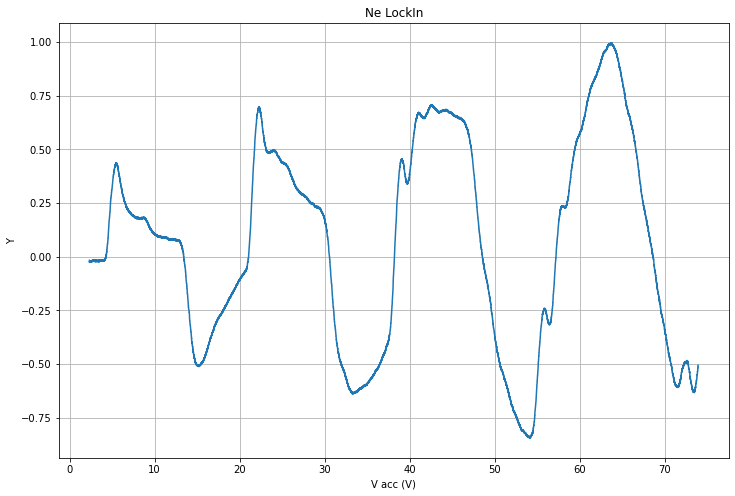

In [30]:
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(Ne_LockIn['V acc'],Ne_LockIn[' Y0'])
plt.xlabel('V acc (V)')
plt.ylabel('Y')
plt.title('Ne LockIn')
plt.show()

Peak at 175.00 has width 108.0
Peak at 1256.00 has width 958.0
Peak at 2573.00 has width 193.7
Peak at 3979.00 has width 73.6
Peak at 8213.00 has width 3817.3
Peak at 8921.00 has width 215.0
Peak at 11111.00 has width 35.6
Peak at 15241.00 has width 254.7
Peak at 16083.00 has width 173.3
Peak at 16714.00 has width 4273.6
Peak at 17274.00 has width 32.0
Peak at 17425.00 has width 317.0
Peak at 22288.00 has width 228.8
Peak at 23194.00 has width 124.4
Peak at 25600.00 has width 4301.2
Peak at 29375.00 has width 416.2


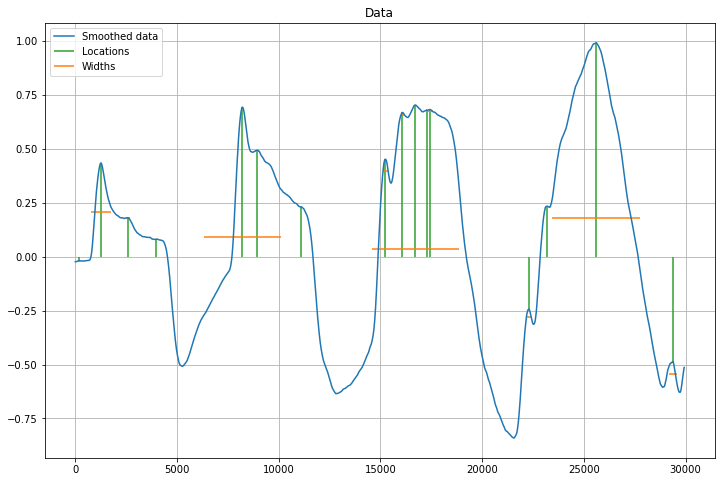

In [31]:
Ne_LockIn_peaks = find_and_plot_peaks(Ne_LockIn['V acc'],Ne_LockIn[' Y0'],makeplot=True, min_width  = 20)
Ne_LockIn_peaks = [Ne_PDA['V acc'][i] for i in Ne_LockIn_peaks]

In [32]:
feature_indices = [1,2,4,5]

features = [Ne_LockIn_peaks[i] for i in feature_indices]
print(features)
list_3p3s = [features[i] - features[i-1] for i in range(1,len(features),2)]

[6.120936998939581, 9.304257123531936, 22.788817371407568, 24.459452932977985]


In [33]:
print('Energy difference measurements (V)')
print(list_3p3s)

udE_3p3s = unc.ufloat(np.mean(list_3p3s), np.std(list_3p3s))

print('Measured average energy difference 3p-3s for neon: {:.1uP} eV'.format(udE_3p3s))

Energy difference measurements (V)
[3.1833201245923552, 1.6706355615704176]
Measured average energy difference 3p-3s for neon: 2.4±0.8 eV


## Mercury Analysis

Calibration first.  Fit a line to the calibration data, create a calibration function.

In [34]:
# fit it and get the constants
### done above

In [35]:
# Make and test calibration function
### done above

### Apply the calibration

Change peak/trough positions into voltages.

In [36]:
# Show the Hg peak/trough positions 
### done above

In [37]:
# Calibrate 
# Recommended: make a new Dataframe.
### done above

### Plot and check

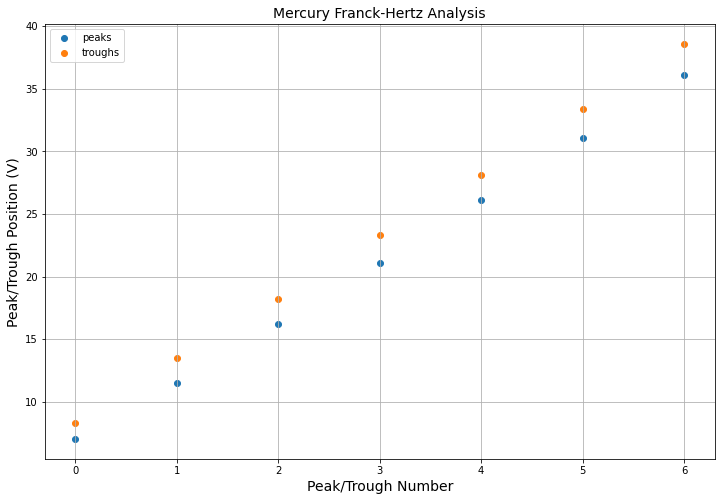

In [38]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Mercury Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)
#

Hg_peaks_num = np.arange(0,len(Hg_peaks))
Hg_troughs_num = np.arange(0,len(Hg_troughs))

plt.scatter(Hg_peaks_num, Hg_peaks, label = 'peaks')
plt.scatter(Hg_troughs_num, Hg_troughs, label = 'troughs')

#
plt.legend();

### Fit positions

As before, fit the peak and trough positions to a line ("traditional") and a quadratic (part of RSB method).  Save the parameters.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 7
    # variables        = 2
    chi-square         = 0.16677000
    reduced chi-square = 0.03335400
    Akaike info crit   = -22.1593486
    Bayesian info crit = -22.2675283
[[Variables]]
    slope:      5.01858398 +/- 0.03451397 (0.69%) (init = 5.018584)
    intercept:  8.30002799 +/- 0.12444190 (1.50%) (init = 8.300028)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


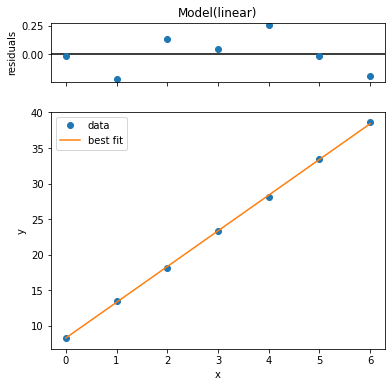

In [39]:
# Line fit, troughs

Hg_troughs_line_fit = model_fit_and_plot(Hg_troughs_num,Hg_troughs,makeplot=True)

[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 7
    # variables        = 3
    chi-square         = 0.02795448
    reduced chi-square = 0.00698862
    Akaike info crit   = -32.6616155
    Bayesian info crit = -32.8238851
[[Variables]]
    a:  0.05459894 +/- 0.00912129 (16.71%) (init = 0.05459894)
    b:  4.54538912 +/- 0.05696242 (1.25%) (init = 4.545389)
    c:  6.96394270 +/- 0.07297029 (1.05%) (init = 6.963943)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.961
    C(b, c) = -0.781
    C(a, c) = 0.625


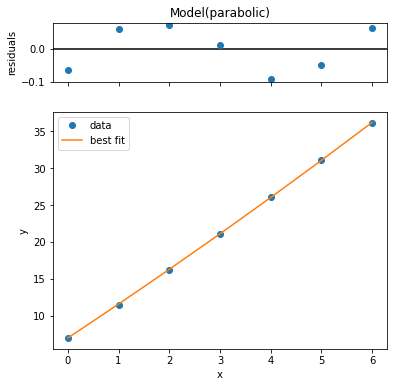

In [40]:
# Quadratic fit, troughs
Hg_troughs_quad_fit = model_fit_and_plot(Hg_peaks_num,Hg_peaks, model = QuadraticModel(), makeplot=True)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 7
    # variables        = 2
    chi-square         = 0.27836222
    reduced chi-square = 0.05567244
    Akaike info crit   = -18.5731955
    Bayesian info crit = -18.6813752
[[Variables]]
    slope:      4.87298278 +/- 0.04459037 (0.92%) (init = 4.872983)
    intercept:  6.69094799 +/- 0.16077288 (2.40%) (init = 6.690948)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


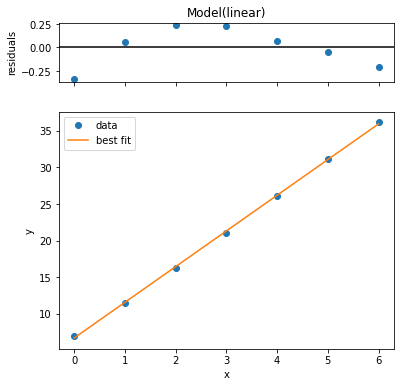

In [41]:
# Line fit, peaks
Hg_peaks_line_fit = model_fit_and_plot(Hg_peaks_num,Hg_peaks,makeplot=True)

[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 7
    # variables        = 3
    chi-square         = 0.02795448
    reduced chi-square = 0.00698862
    Akaike info crit   = -32.6616155
    Bayesian info crit = -32.8238851
[[Variables]]
    a:  0.05459894 +/- 0.00912129 (16.71%) (init = 0.05459894)
    b:  4.54538912 +/- 0.05696242 (1.25%) (init = 4.545389)
    c:  6.96394270 +/- 0.07297029 (1.05%) (init = 6.963943)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.961
    C(b, c) = -0.781
    C(a, c) = 0.625


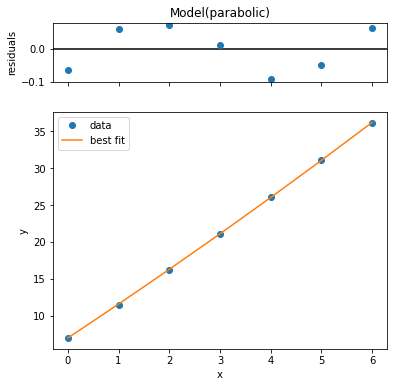

In [42]:
# Quadratic fit, peaks
Hg_peaks_quad_fit = model_fit_and_plot(Hg_peaks_num,Hg_peaks,model=QuadraticModel(),makeplot=True)

### Make a plot

Show, on a single plot, the peak positions, the trough positions (both as dots) with fit lines and fit curves for each.  One member of the grou should include this plot in your Group Document.

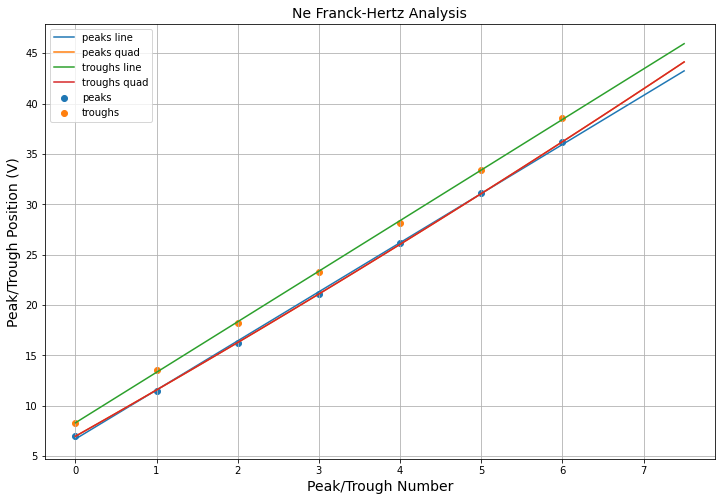

In [43]:
line = LinearModel()
quad = QuadraticModel()

xfit = np.linspace(0,7.5,100) 
Hg_troughs_line = line.eval(Hg_troughs_line_fit,x=xfit)
Hg_peaks_line = line.eval(Hg_peaks_line_fit,x=xfit)

Hg_troughs_quad = quad.eval(Hg_troughs_quad_fit,x=xfit)
Hg_peaks_quad = quad.eval(Hg_peaks_quad_fit,x=xfit)
# Add more, as needed

# Then redo the above plot with fit lines and curves

### Hg
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Ne Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

plt.scatter(Hg_peaks_num, Hg_peaks, label = 'peaks')
plt.scatter(Hg_troughs_num, Hg_troughs, label = 'troughs')

plt.plot(xfit, Hg_peaks_line, label = 'peaks line')
plt.plot(xfit, Hg_peaks_quad, label = 'peaks quad')
plt.plot(xfit, Hg_troughs_line, label = 'troughs line')
plt.plot(xfit, Hg_troughs_quad, label = 'troughs quad')

plt.legend();
plt.show()

### Calculate peak/trough differences

As before, carry out the RSB approach as they describe it, by taking the <i>differences</i> in the positions of subsequent features to create an array $\Delta E(n) = E_n - E_{n-1}$; note $n$ is the upper number.

Then, plot and fit these to a line.  The energy of the lowest excited state should be given by $\Delta E(0.5)$.  Save the fit parameters as before.

In [44]:
# Same process as before, except you have more data points.
# Recommended: use Python "List comprehensions"


Hg_troughs_diff = [Hg_troughs[i] - Hg_troughs[i-1] for i in range(1,len(Hg_troughs))]
Hg_peaks_diff = [Hg_peaks[i] - Hg_peaks[i-1] for i in range(1,len(Hg_peaks))]


print('List of Hg peak differences (V):', Hg_peaks_diff)
print('List of Hg trough differences (V):', Hg_troughs_diff)

List of Hg peak differences (V): [4.47467267929709, 4.697949610448232, 4.877586050510729, 5.031850112033336, 4.994298991794285, 5.0338799023165315]
List of Hg trough differences (V): [5.216561027803822, 4.669532546483538, 5.102892771945065, 4.815677446873369, 5.287603687715542, 5.191188649263921]


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 5
    # variables        = 2
    chi-square         = 0.12134038
    reduced chi-square = 0.04044679
    Akaike info crit   = -14.5929679
    Bayesian info crit = -15.3740921
[[Variables]]
    slope:      0.12280231 +/- 0.06359779 (51.79%) (init = 0.1228023)
    intercept:  4.76777440 +/- 0.15578214 (3.27%) (init = 4.767774)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.816


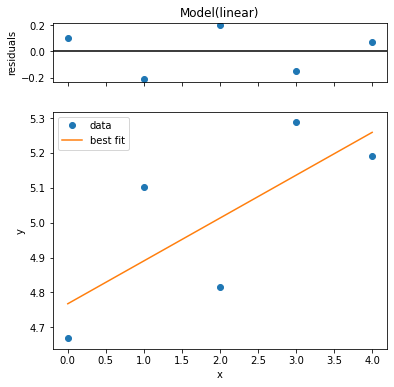

In [45]:
## remove first point
Hg_troughs_diff = Hg_troughs_diff[1:]

# Line fit to trough diffs
Hg_troughs_diff_num = np.arange(0, len(Hg_troughs_diff))
Hg_troughs_diff_line_fit = model_fit_and_plot(Hg_troughs_diff_num , Hg_troughs_diff,makeplot=True)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 6
    # variables        = 2
    chi-square         = 0.04185699
    reduced chi-square = 0.01046425
    Akaike info crit   = -25.7915362
    Bayesian info crit = -26.2080172
[[Variables]]
    slope:      0.10969567 +/- 0.02445316 (22.29%) (init = 0.1096957)
    intercept:  4.57746706 +/- 0.07403561 (1.62%) (init = 4.577467)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.826


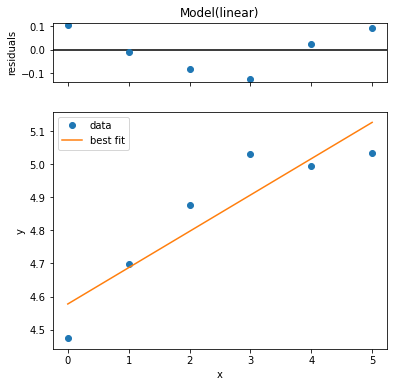

In [46]:
# Line fit to peak diffs
Hg_peaks_diff_num = np.arange(0, len(Hg_peaks_diff))
Hg_peaks_diff_line_fit = model_fit_and_plot(Hg_peaks_diff_num , Hg_peaks_diff,makeplot=True)

### Make a differences plot

Show, on a single plot, the peak position differences, the trough position differences (both as dots) with fit lines for each.  One member of the grou should include this plot in your Group Document.

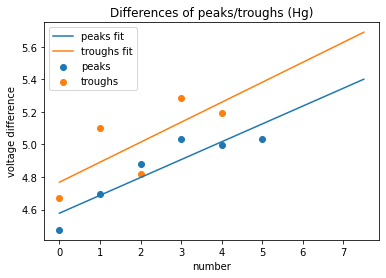

In [47]:
# Plot
plt.title('Differences of peaks/troughs (Hg)')
plt.xlabel('number')
plt.ylabel('voltage difference')
plt.scatter(Hg_peaks_diff_num, Hg_peaks_diff, label = 'peaks')
plt.scatter(Hg_troughs_diff_num, Hg_troughs_diff, label = 'troughs')

xfit = np.linspace(0,7.5,100) 
Hg_troughs_diff_line = line.eval(Hg_troughs_diff_line_fit,x=xfit)
Hg_peaks_diff_line = line.eval(Hg_peaks_diff_line_fit,x=xfit)

plt.plot(xfit, Hg_peaks_diff_line, label = 'peaks fit')
plt.plot(xfit, Hg_troughs_diff_line, label = 'troughs fit')

plt.legend()

## Final results for Hg

Calculate the losest excited state energy, as was done for neon. 

In [53]:
print('CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD')
print('Troughs analysis:')
# Your code here
p = unc.ufloat(Hg_troughs_diff_line_fit['intercept'].value, Hg_troughs_diff_line_fit['intercept'].stderr)
m = unc.ufloat(Hg_troughs_diff_line_fit['slope'].value, Hg_troughs_diff_line_fit['slope'].stderr)
a = unc.ufloat(Hg_troughs_quad_fit['a'].value, Hg_troughs_quad_fit['a'].stderr)
b = unc.ufloat(Hg_troughs_quad_fit['b'].value, Hg_troughs_quad_fit['b'].stderr)
c = unc.ufloat(Hg_troughs_quad_fit['c'].value, Hg_troughs_quad_fit['c'].stderr)

Ea_quad_troughs = b
Ea_line_troughs = p + m / 2

print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\nPeaks analysis:')
# Your code here
p = unc.ufloat(Hg_peaks_diff_line_fit['intercept'].value, Hg_peaks_diff_line_fit['intercept'].stderr)
m = unc.ufloat(Hg_peaks_diff_line_fit['slope'].value, Hg_peaks_diff_line_fit['slope'].stderr)
a = unc.ufloat(Hg_peaks_quad_fit['a'].value, Hg_peaks_quad_fit['a'].stderr)
b = unc.ufloat(Hg_peaks_quad_fit['b'].value, Hg_peaks_quad_fit['b'].stderr)
c = unc.ufloat(Hg_peaks_quad_fit['c'].value, Hg_peaks_quad_fit['c'].stderr)

print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\n\nCALCULATION OF FIRST EXCITED STATE OF Hg FROM DIFFERENT METHODS')

# Your code here

Ea_trad_pk = unc.ufloat(np.mean(Hg_peaks_diff), np.std(Hg_peaks_diff))
Ea_trad_tr = unc.ufloat(np.mean(Hg_troughs_diff), np.std(Hg_troughs_diff))

print('"Traditional" average peak spacing: {:.2uP} V'.format(Ea_trad_pk))
print('"Traditional" average trough spacing: {:.2uP} V'.format(Ea_trad_tr))

# From quadratic fit, see E_a as parameter b
# From RSB n=1/2 method, E_a = p + m/2

# Your code here

Ea_quad_peaks = b
Ea_line_peaks = p + m / 2

Ea_line = (Ea_line_peaks + Ea_line_troughs)/2
Ea_quad = (Ea_quad_peaks + Ea_quad_troughs)/2

print('\nRSB method using line fit to peak/trough position differences')

# Your code here
print(Ea_line)

print('\nRSB method using quadratic fit to peak/trough positions')

# Your code here
print(Ea_quad)


CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD
Troughs analysis:
p ?= b-a: 4.77+/-0.16 ?= 4.49+/-0.06 = 4.55+/-0.06-0.05+/-0.01
m ?= 2a: 0.12+/-0.06 ?= 0.11+/-0.02 = 2*0.05+/-0.01

Peaks analysis:
p ?= b-a: 4.58+/-0.07 ?= 4.49+/-0.06 = 4.55+/-0.06-0.05+/-0.01
m ?= 2a: 0.11+/-0.02 ?= 0.11+/-0.02 = 2*0.05+/-0.01


CALCULATION OF FIRST EXCITED STATE OF Hg FROM DIFFERENT METHODS
"Traditional" average peak spacing: 4.85±0.21 V
"Traditional" average trough spacing: 5.01±0.23 V

RSB method using line fit to peak/trough position differences
4.73+/-0.09

RSB method using quadratic fit to peak/trough positions
4.55+/-0.04


## Calculation of mean free path $\lambda$

The parameter $\lambda/L$ contains the mean free path between electron collisions.  Calculate this value for Hg given the measureable distance between the cathode and grid $L$.  See photos of the apparatus to obtain this value.

NOTE: You cannot use the word `lambda` as a variable in Python.  It is a keyword (something that is defined by the language).

--

From the RSB method,
$ \lambda = \frac{L}{2 E_a} \frac{d \Delta E(n)}{dn} $


In [56]:
## Your code here.  Use uncertainty objects and uncertainties in fit parameters to get uncertainty in mean free path.

L = unc.ufloat(0.007,0.0005) # m <--- need to get better measurement !!!
m_peaks = unc.ufloat(Hg_peaks_diff_line_fit['slope'].value, Hg_peaks_diff_line_fit['slope'].stderr)

m_troughs = unc.ufloat(Hg_troughs_diff_line_fit['slope'].value, Hg_troughs_diff_line_fit['slope'].stderr)
p_troughs = p = unc.ufloat(Hg_troughs_diff_line_fit['intercept'].value, Hg_troughs_diff_line_fit['intercept'].stderr)

Ea_line_troughs = p_troughs + m_troughs / 2

mean_free_path_peaks = (L / (2 * Ea_line_peaks)) * m_peaks
mean_free_path_troughs = (L / (2 * Ea_line_troughs)) * m_troughs

print('CALCULATION OF MEAN FREE PATH, RSB METHOD (from linear fits)\n')
print('Mean free path from troughs fit = {:.2uP} mm'.format((mean_free_path_troughs*1000)))
print('Mean free path from peaks fit = {:.2uP} mm'.format((mean_free_path_peaks*1000)))

# Print comparison to RSB results

CALCULATION OF MEAN FREE PATH, RSB METHOD (from linear fits)

Mean free path from troughs fit = 0.089±0.046 mm
Mean free path from peaks fit = 0.083±0.019 mm
